# Analisis EDA

importamos las principales librerias para realizar este analisis exploratorio de datos

In [30]:
# Importar las bibliotecas necesarias
import pandas as pd # Para el manejo de datos
import matplotlib.pyplot as plt # Para la visualización de datos
import seaborn as sns # Para la visualización de datos
from sklearn.preprocessing import MinMaxScaler # Para la normalización de datos
import datetime as dt # Para el manejo de fechas
import numpy as np # Para el manejo de arreglos
import os # Para el manejo de archivos

cargaremos los datos con los que trabajaremos

In [31]:
# Cargar los datos
nombre_archivo = 'datos_evaluacion_2.xlsx'
# Obtener la ruta al directorio actual
directorio_actual = os.getcwd()

# Crear la ruta completa al archivo
file = os.path.join(directorio_actual, nombre_archivo)

data = pd.read_excel(file)

visualizaremos primero los datos, en este caso las primeras 5 filas

In [32]:
# Análisis exploratorio inicial
data.head()

,IdCliente,Fecha Nacimiento,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones
0,1,1933-02-17,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si
1,2,1928-02-17,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No
2,3,1930-02-18,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No
3,4,1931-02-20,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si
4,5,1931-02-20,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si


sacamos diferentes calculos con el comando describe como el conteo total, valores unicos, promedio, percentiles de las diferentes columnbas

In [33]:
data.describe(include='all')

,IdCliente,Fecha Nacimiento,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones
count,45200.00000,45200,45200,45200,45200,45200,4.520000e+04,45200,45200,45200,45200.000000,45200
unique,NaN,NaN,7,3,4,2,NaN,2,2,3,NaN,2
top,NaN,NaN,Trabajador Dependiente,Casado,Universitario,No,NaN,Si,No,Celular,NaN,No
freq,NaN,NaN,27561,27214,29127,43052,NaN,25130,37956,30863,NaN,41745
mean,22600.50000,1968-08-24 07:00:33.769911504,NaN,NaN,NaN,NaN,1.362512e+06,NaN,NaN,NaN,0.580332,NaN
min,1.00000,1928-02-17 00:00:00,NaN,NaN,NaN,NaN,-8.019000e+06,NaN,NaN,NaN,0.000000,NaN
25%,11300.75000,1964-04-04 00:00:00,NaN,NaN,NaN,NaN,7.200000e+04,NaN,NaN,NaN,0.000000,NaN
50%,22600.50000,1968-04-18 00:00:00,NaN,NaN,NaN,NaN,4.485000e+05,NaN,NaN,NaN,0.000000,NaN
75%,33900.25000,1972-04-24 00:00:00,NaN,NaN,NaN,NaN,1.428000e+06,NaN,NaN,NaN,0.000000,NaN
max,45200.00000,1990-05-03 00:00:00,NaN,NaN,NaN,NaN,1.021270e+08,NaN,NaN,NaN,275.000000,NaN


comprobamos si hay datos nulos y duplicados para posteriormente eliminarlos

In [34]:
data.isnull().sum()

IdCliente                       0
Fecha Nacimiento                0
Actividad Laboral               0
Estado Civil                    0
Nivel Educacional               0
Tiene Mora                      0
Saldo Medio Anual               0
Tiene Crédito Hipotecario       0
Tiene Crédito de Consumo        0
Medio de Contacto Preferente    0
Contactos con su Ejecutivo      0
Tiene Inversiones               0
dtype: int64

In [35]:
data.duplicated().sum()

0

agregamos la columna edad ya que necesitamos saber cuantos anios tienen nuestros clientes, con solo la fecha de nacimiento se nos puede hacer dificil saber la edad exacta

In [36]:
# Ingeniería de datos (agregar la columna de edad)
current_year = dt.datetime.now().year
data['Edad'] = current_year - pd.DatetimeIndex(data['Fecha Nacimiento']).year

data[["Edad"]]

# finalmente eliminamos la columa Fecha Nacimiento ya que solo nos interesa la edad
data = data.drop(columns=['Fecha Nacimiento'])

data.head()

,IdCliente,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones,Edad
0,1,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si,91
1,2,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No,96
2,3,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No,94
3,4,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si,93
4,5,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si,93


guardamos el archivo con esta nueva columna de edad

In [16]:
# ahora exporto el archivo con la nueva columna Edad
data.to_excel('data_set_edad.xlsx', index=False)

ahora seguimos agregando columnas

In [37]:
#Edad en Rango
data['Edad en Rango'] = pd.cut(data['Edad'], 
                               bins=[0, 35, 50, 65, 100], 
                               labels=['Joven', 'Adulto', 'Adulto Mayor', 'Senior'])

#Saldo Medio Anual en Rango
data['Saldo Medio Anual en Rango'] = pd.cut(data['Saldo Medio Anual'], 
                                            bins=[-1, 10000, 50000, 100000, 500000, 1000000, 
                                            data['Saldo Medio Anual'].max()], 
                                            labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto', 'Extremo'])

#Número de Productos Financieros
data['Número de Productos Financieros'] = data[['Tiene Crédito Hipotecario', 'Tiene Crédito de Consumo', 'Tiene Inversiones']].applymap(lambda x: 1 if x == 'Si' else 0).sum(axis=1)

#Preferencia de Contacto en Variables Binarias
data['Prefiere Celular'] = data['Medio de Contacto Preferente'] == 'Celular'
data['Prefiere Email'] = data['Medio de Contacto Preferente'] == 'Email'
data['Prefiere Fono Particular'] = data['Medio de Contacto Preferente'] == 'Fono Particular'

#Clasificación del Nivel de Interacción con el Ejecutivo
data['Interacción con el Ejecutivo'] = pd.cut(data['Contactos con su Ejecutivo'], bins=[-1, 10, 100, 258], labels=['Bajo', 'Medio', 'Alto'])


C:\Users\danie\AppData\Local\Temp\ipykernel_8480\1045418297.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data['Número de Productos Financieros'] = data[['Tiene Crédito Hipotecario', 'Tiene Crédito de Consumo', 'Tiene Inversiones']].applymap(lambda x: 1 if x == 'Si' else 0).sum(axis=1)


veamos como quedaron los datos con estas nuevas columnas

In [38]:
data

,IdCliente,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones,Edad,Edad en Rango,Saldo Medio Anual en Rango,Número de Productos Financieros,Prefiere Celular,Prefiere Email,Prefiere Fono Particular,Interacción con el Ejecutivo
0,1,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si,91,Senior,Extremo,1,False,False,True,Bajo
1,2,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No,96,Senior,Muy Bajo,0,False,False,True,Bajo
2,3,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No,94,Senior,Extremo,0,True,False,False,Bajo
3,4,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si,93,Senior,Muy Alto,1,True,False,False,Bajo
4,5,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si,93,Senior,Muy Alto,1,True,False,False,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45195,45196,Trabajador Dependiente,Soltero,Enseñanza Básica,No,134000,No,No,Celular,0,No,43,Adulto,Alto,0,True,False,False,Bajo
45196,45197,Trabajador Dependiente,Soltero,Técnico Profesional,No,779000,No,No,Celular,0,Si,40,Adulto,Muy Alto,1,True,False,False,Bajo
45197,45198,Trabajador Dependiente,Soltero,Enseñanza Media,No,96000,No,No,Celular,0,No,41,Adulto,Medio,0,True,False,False,Bajo
45198,45199,Trabajador Dependiente,Soltero,Enseñanza Básica,No,1247000,No,No,Celular,0,No,40,Adulto,Extremo,0,True,False,False,Bajo


ahora toca normalizar datos, esto nos puede ayudar para que los algoritmos de aprendizaje automatico funcionen correctamente

In [39]:
scaler = MinMaxScaler()
data[['Saldo Medio Anual', 'Contactos con su Ejecutivo']] = scaler.fit_transform(data[['Saldo Medio Anual', 'Contactos con su Ejecutivo']])

data[["Saldo Medio Anual", "Contactos con su Ejecutivo"]]

,Saldo Medio Anual,Contactos con su Ejecutivo
0,0.093521,0.000000
1,0.072803,0.000000
2,0.084007,0.000000
3,0.079839,0.025455
4,0.079839,0.032727
...,...,...
45195,0.074020,0.000000
45196,0.079876,0.000000
45197,0.073675,0.000000
45198,0.084125,0.000000


ahora verificaremos los valores atipicos mediante diagramas de caja

<Axes: xlabel='Edad'>

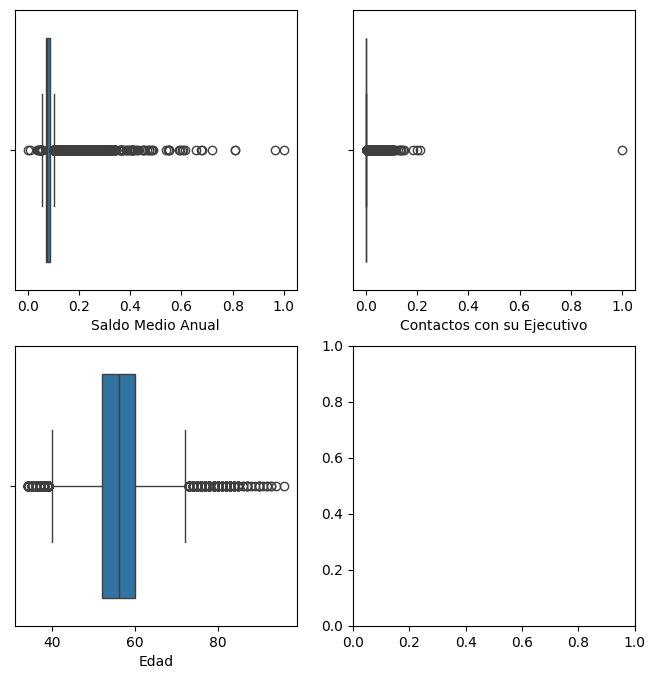

In [40]:
# eliminaremos valores atipicos usando el metodo de los cuantiles pero 
# primero debemos verificar si existen valores atipicos

fig, axs = plt.subplots(figsize=(8,8), ncols=2, nrows=2)

sns.boxplot(x=data['Saldo Medio Anual'], ax=axs[0,0])
sns.boxplot(x=data['Contactos con su Ejecutivo'], ax=axs[0,1])
sns.boxplot(x=data['Edad'], ax=axs[1,0])



**para saldo medio anual:** 
- existe una gran cantidad de valores atipicos en el extremo superior, lo cual indica que hay clientes con saldos anuales significativamente mayores que la mayoria. la mayoria de los datos se concentran cerca del valor minimo y la mediana, lo que sugiere una distribucion sesgada hacia valores bajos

**para contactos con su ejecutivo:** 
- similar al Saldo Medio Anual, hay muchos valores atipicos en el extremo superior. esto sugiere que algunas personas tienen un numero de contactos con su ejecutivo muy alto en comparación con el resto. la concentracion de la mayoria de los datos tambien se encuentra cerca del valor minimo y la mediana, indicando que la mayoría de los clientes tienen pocos contactos con su ejecutivo

**para la edad:** 
- se observa que hay algunos valores atipicos en los extremos inferiores y superiores, pero no tan extremos como en las otras dos variables. la mayoria de los datos se concentran en un rango mas estrecho alrededor de la mediana, lo que indica una distribucion mas uniforme comparada con las otras variables

creamos la funcion para eliminar valores atipicos

In [58]:
# Definir una función para identificar valores atípicos usando IQR
def detectar_valores_atipicos(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Aplicar la función a las columnas numéricas normalizadas
outliers_saldo = detectar_valores_atipicos(data, 'Saldo Medio Anual')
outliers_contactos = detectar_valores_atipicos(data, 'Contactos con su Ejecutivo')
outliers_edad = detectar_valores_atipicos(data, 'Edad')

# Combinar los resultados
outliers_combined = pd.concat([outliers_saldo, outliers_contactos, outliers_edad]).drop_duplicates()

# Mostrar la cantidad de valores atípicos en cada columna
outliers_summary = {
    'Saldo Medio Anual': len(outliers_saldo),
    'Contactos con su Ejecutivo': len(outliers_contactos),
    'Edad': len(outliers_edad),
    'Total Unico': len(outliers_combined)
}
outliers_summary


{'Saldo Medio Anual': 4731,
 'Contactos con su Ejecutivo': 8254,
 'Edad': 756,
 'Total Unico': 12534}

In [61]:
data_2 = outliers_combined

visualizamos los datos en histogramas

<Axes: xlabel='Edad', ylabel='Count'>

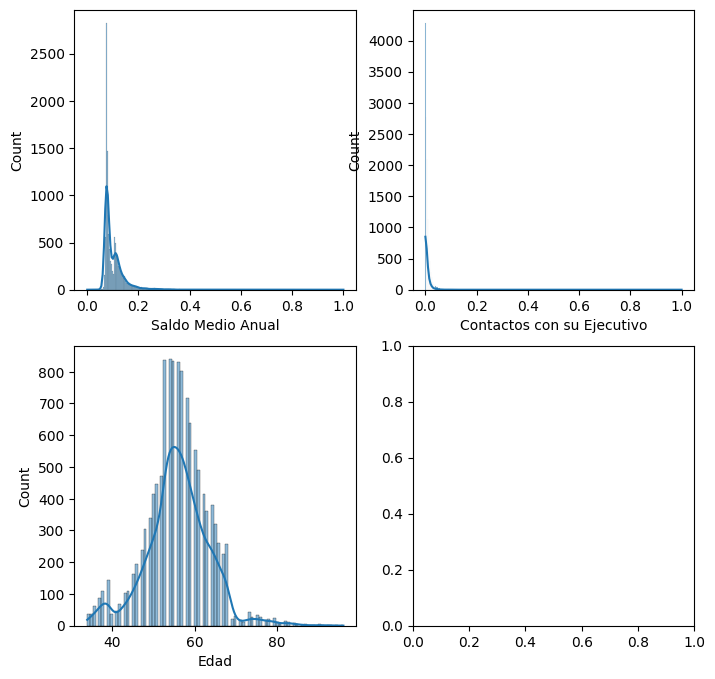

In [64]:
# Visualización de los datos
fig, axs = plt.subplots(figsize=(8,8), ncols=2, nrows=2)

sns.histplot(data_2['Saldo Medio Anual'], kde=True, ax=axs[0,0])
sns.histplot(data_2['Contactos con su Ejecutivo'], kde=True, ax=axs[0,1])
sns.histplot(data_2['Edad'], kde=True, ax=axs[1,0])



**para saldo medio anual:** 
- la distribucion es altamente sesgada hacia la izquierda (positively skewed), con una gran concentracion de valores muy bajos. hay una cola larga hacia la derecha, indicando que existen algunos valores significativamente mas altos que la mayoria

**para contactos con su ejecutivo:** 
- similar a Saldo Medio Anual, esta variable tambien muestra una distribucion altamente sesgada hacia la izquierda. la mayoria de los datos se concentran en valores bajos, con una larga cola hacia la derecha que sugiere la presencia de algunos valores mucho mas altos

**para la edad:**
- parece ser más simetrica en comparación con las otras dos variables. hay una concentracion de datos entre los 40 y 60 años, lo cual es indicativo de una poblacion de edad media predominante. aunque hay algunas observaciones menores hacia los extremos, no son tan pronunciadas como en las otras variables

visualizamos los datos en boxplot

<Axes: xlabel='Edad'>

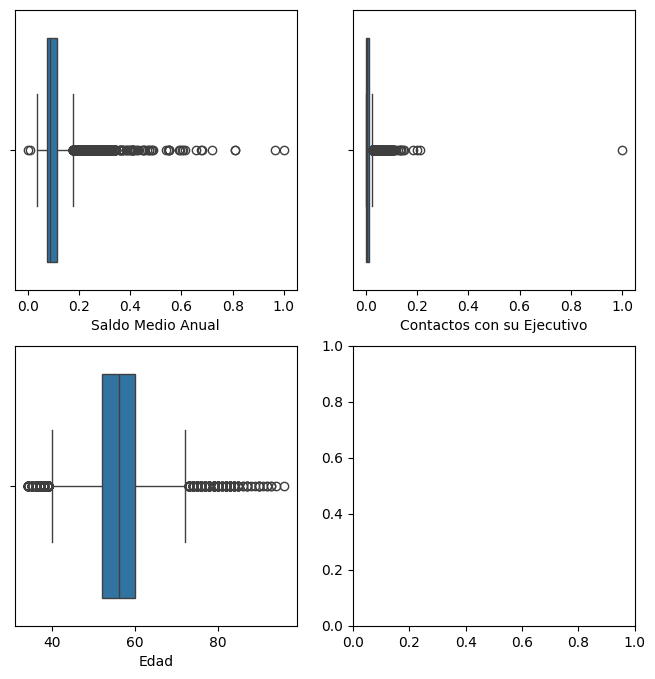

In [65]:
fig, axs = plt.subplots(figsize=(8,8), ncols=2, nrows=2)

sns.boxplot(x=data_2['Saldo Medio Anual'], ax=axs[0,0])
sns.boxplot(x=data_2['Contactos con su Ejecutivo'], ax=axs[0,1])
sns.boxplot(x=data_2['Edad'], ax=axs[1,0])

**saldo medio anual:**
- la distribucion sigue mostrando una cierta dispersión, pero con una reduccion significativa de los valores extremos. la mayoria de los datos se concentran en valores bajos, con algunos valores un poco mas altos pero ya sin los extremos anteriores.

**contactos con su ejecutivo:**
- La dispersion de los datos sigue siendo visible, aunque se han eliminado los valores mas extremos. La mayoria de los datos siguen concentrandose en valores bajos, indicando que la mayoria de los clientes tienen pocos contactos con su ejecutivo

**edad:**
- la distribucion de la edad se muestra mas contenida y concentrada alrededor de la mediana, con una dispersión menor comparada con la observación inicial con valores atipicos

ahora haremos diferentes graficos 

In [66]:
# Estilo de las visualizaciones
sns.set_theme(style="whitegrid")

Descriptivas y Distribuciones

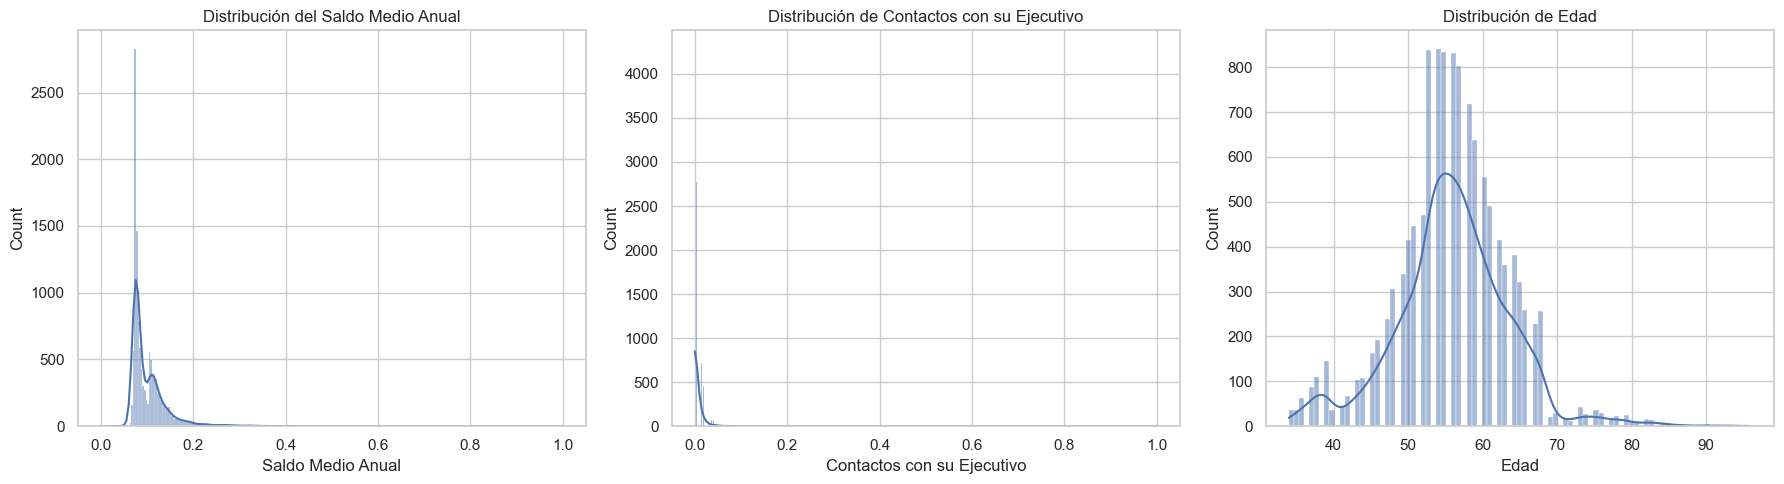

In [69]:
# Distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data_2['Saldo Medio Anual'], kde=True, ax=axes[0])
axes[0].set_title('Distribución del Saldo Medio Anual')

sns.histplot(data_2['Contactos con su Ejecutivo'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Contactos con su Ejecutivo')

sns.histplot(data_2['Edad'], kde=True, ax=axes[2])
axes[2].set_title('Distribución de Edad')

plt.tight_layout()
plt.show()

la explicacion esta mas arriba ⬆️

Correlaciones y Mapas de Calor

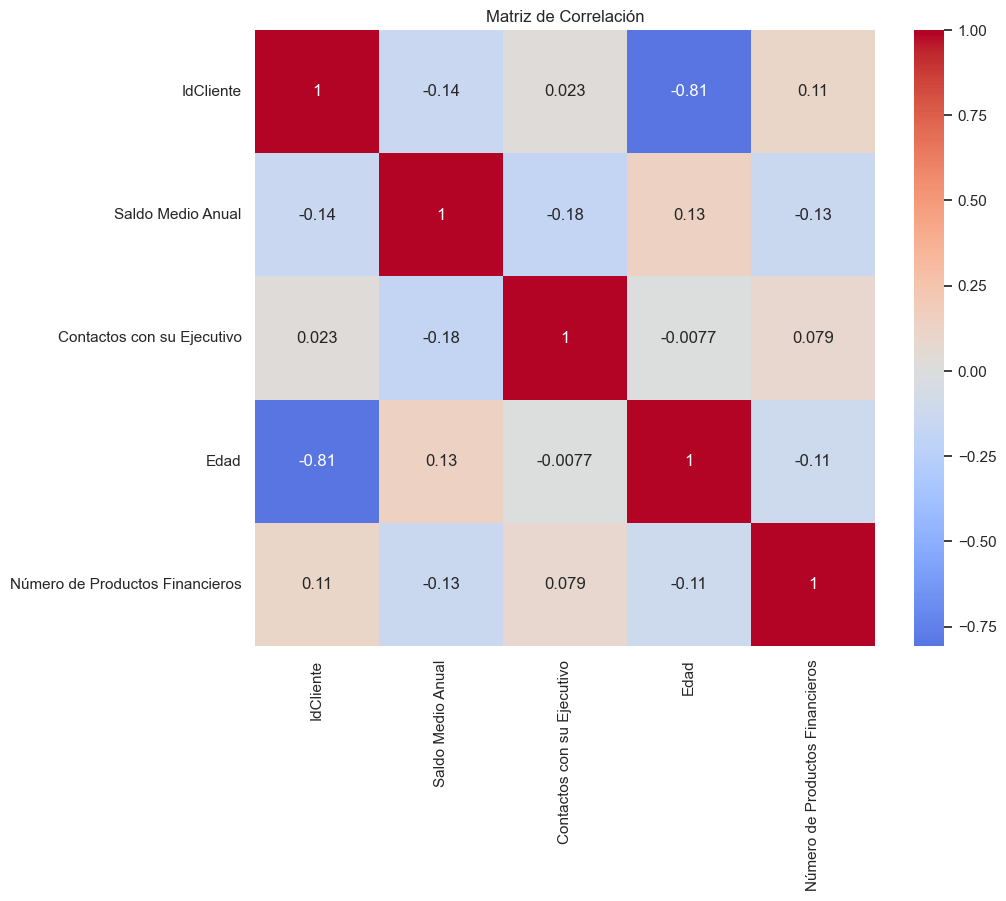

In [73]:
# seleccionamos solo datos numericos
data_numeric = data_2.select_dtypes(include=[np.number])

# Matriz de correlación
correlation_matrix = data_numeric.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

##### Correlaciones Significativas: 
**edad e idCliente:**
- Existe una fuerte correlación negativa entre Edad e IdCliente (-0.81). Esto sugiere que a medida que el IdCliente aumenta, la edad del cliente disminuye. Es posible que los clientes con identificadores más altos sean más jóvenes, lo cual puede indicar un orden cronológico en la asignación de IdCliente.

##### Correlaciones Moderadas a Débiles:
**Saldo Medio Anual y Contactos con su Ejecutivo:**
- Hay una correlación negativa débil entre Saldo Medio Anual y Contactos con su Ejecutivo (-0.18). Esto sugiere que, en promedio, los clientes con saldos medios anuales más altos tienden a tener menos contactos con su ejecutivo, aunque esta relación no es muy fuerte.

**Saldo Medio Anual y Edad:**
- Existe una correlación positiva débil entre Saldo Medio Anual y Edad (0.13). Esto indica que, en promedio, los clientes mayores tienden a tener un saldo medio anual ligeramente mayor.

##### Correlaciones Muy Débiles o Insignificantes:
**Contactos con su Ejecutivo y Edad:**
- La correlación entre Contactos con su Ejecutivo y Edad es prácticamente nula (-0.0077), lo que sugiere que no hay una relación significativa entre la edad del cliente y la cantidad de contactos con su ejecutivo.
     
**Número de Productos Financieros:**
- Las correlaciones entre Número de Productos Financieros y las demás variables son débiles. Esto sugiere que la cantidad de productos financieros que tiene un cliente no está fuertemente relacionada con su saldo medio anual, su edad o la cantidad de contactos con su ejecutivo.

comparacion entre variables

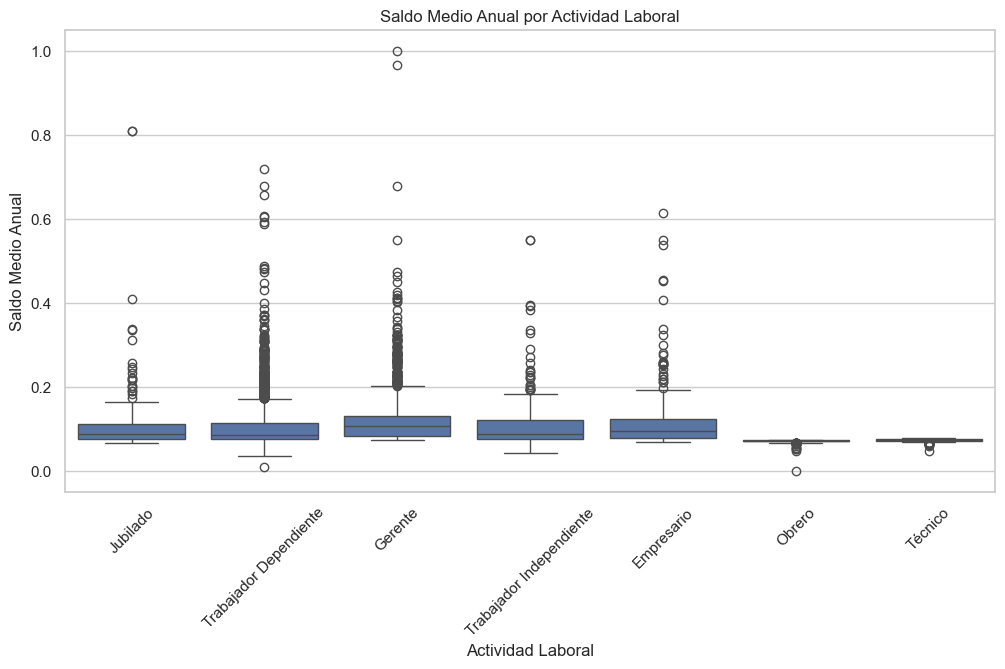

In [72]:
# Boxplot del Saldo Medio Anual por Actividad Laboral
plt.figure(figsize=(12, 6))
sns.boxplot(x='Actividad Laboral', y='Saldo Medio Anual', data=data_2)
plt.xticks(rotation=45)
plt.title('Saldo Medio Anual por Actividad Laboral')
plt.show()

#### Observaciones Generales:
Jubilado:
- Los jubilados tienden a tener un Saldo Medio Anual relativamente bajo en comparación con otras categorías laborales. Existen algunos valores atípicos significativos en el extremo superior.

Trabajador Dependiente:
- Esta categoría muestra una distribución más amplia del Saldo Medio Anual. También presenta valores atípicos significativos en el extremo superior, pero con una mayor dispersión en comparación con los jubilados.

Gerente:
- Los gerentes presentan una distribución similar a los trabajadores dependientes en términos de mediana y dispersión. Existen valores atípicos en el extremo superior, aunque están más concentrados cerca de la mediana en comparación con otras categorías.

Trabajador Independiente:
- Los trabajadores independientes tienen una dispersión similar a los gerentes y trabajadores dependientes. También hay valores atípicos en el extremo superior, pero con una mayor dispersión.

Empresario:
- Los empresarios presentan una distribución más contenida del Saldo Medio Anual. La mediana es ligeramente más alta en comparación con otras categorías, pero con menos valores atípicos.

Obrero:
- Los obreros tienen el Saldo Medio Anual más bajo en comparación con todas las otras categorías laborales. La dispersión es mínima, y hay pocos valores atípicos.

Técnico:
- Los técnicos tienen una mediana baja similar a los obreros. La dispersión es mínima, y también hay pocos valores atípicos.

otros graficos

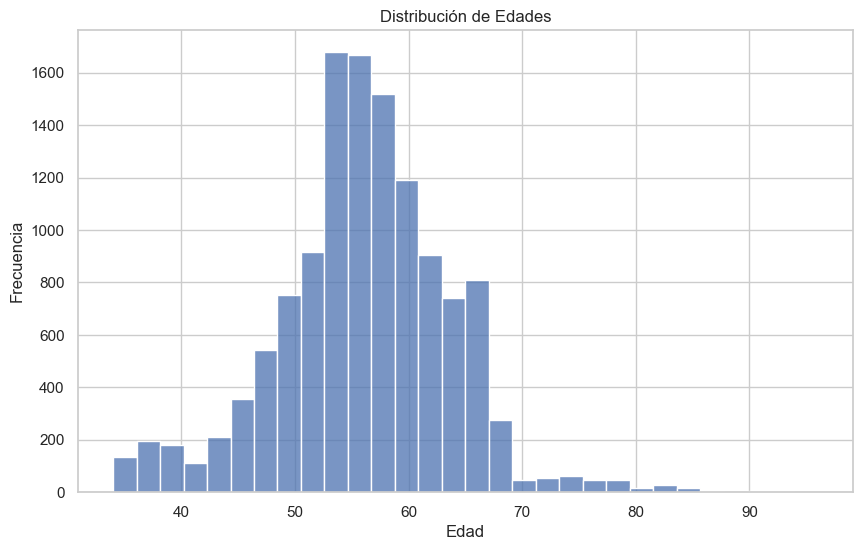

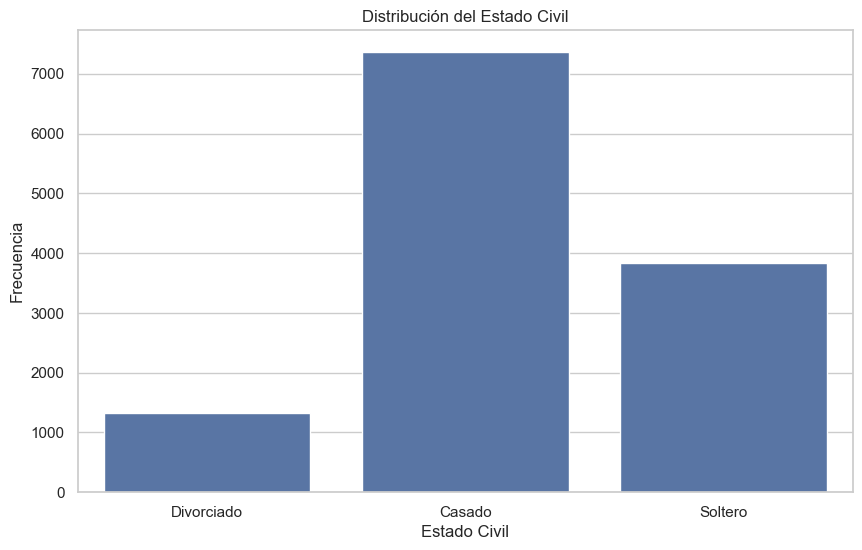

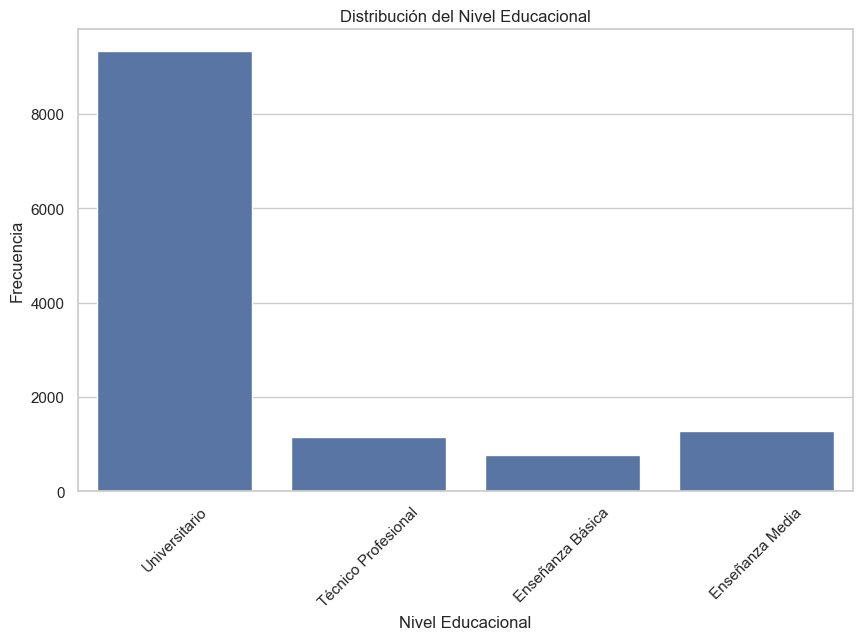

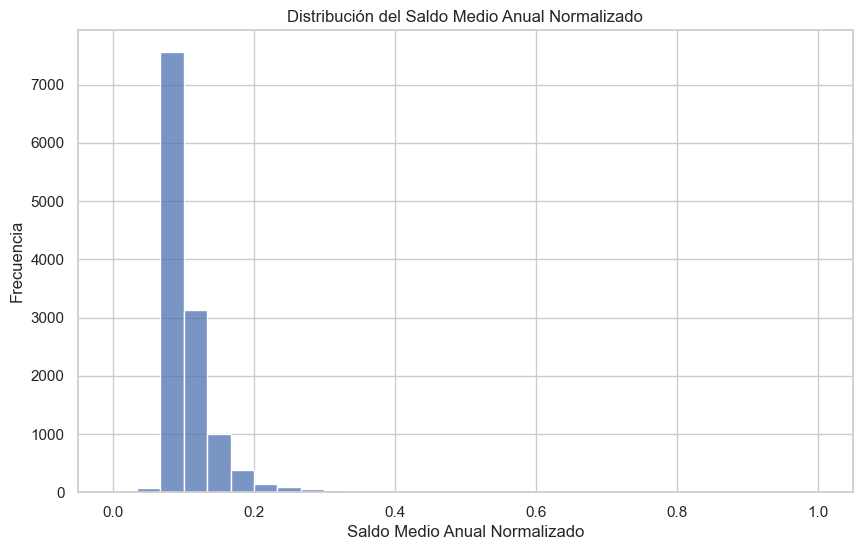

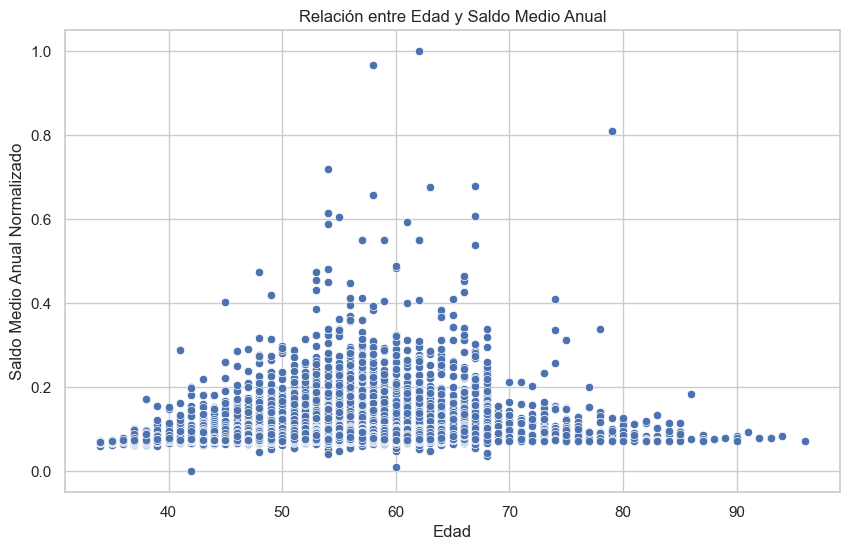

In [77]:
# Histograma de Edades
plt.figure(figsize=(10, 6))
sns.histplot(data_2['Edad'], bins=30, kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Estado Civil
plt.figure(figsize=(10, 6))
sns.countplot(x='Estado Civil', data=data_2)
plt.title('Distribución del Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Nivel Educacional
plt.figure(figsize=(10, 6))
sns.countplot(x='Nivel Educacional', data=data_2)
plt.title('Distribución del Nivel Educacional')
plt.xlabel('Nivel Educacional')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Histograma de Saldo Medio Anual normalizado
plt.figure(figsize=(10, 6))
sns.histplot(data_2['Saldo Medio Anual'], bins=30, kde=False)
plt.title('Distribución del Saldo Medio Anual Normalizado')
plt.xlabel('Saldo Medio Anual Normalizado')
plt.ylabel('Frecuencia')
plt.show()

# Scatter plot de Edad vs Saldo Medio Anual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Saldo Medio Anual', data=data_2)
plt.title('Relación entre Edad y Saldo Medio Anual')
plt.xlabel('Edad')
plt.ylabel('Saldo Medio Anual Normalizado')
plt.show()

## Observaciones Generales

### primer grafico:
Rango de Edades Predominante:
- La mayoría de los clientes se encuentran en el rango de edad de 40 a 70 años. La mayor concentración se encuentra entre los 50 y 60 años, con un pico alrededor de los 55 años.

Forma de la Distribución:
- La distribución tiene una forma aproximadamente normal, pero ligeramente sesgada hacia la derecha. Hay una disminución gradual en la frecuencia a medida que la edad aumenta más allá de los 60 años.

Extremos de la Distribución:
- Hay pocos clientes menores de 40 años y mayores de 70 años. La frecuencia disminuye significativamente en los extremos del rango de edades.

### segundo grafico:
Casado:
- La categoría de estado civil más predominante es la de Casado, con una frecuencia significativamente mayor que las otras dos categorías. Esto sugiere que la mayoría de los clientes en el dataset están casados.

Soltero:
- La segunda categoría más común es la de Soltero, pero su frecuencia es considerablemente menor que la de los clientes casados. Aun así, hay una cantidad significativa de clientes solteros en el dataset.

Divorciado:
- La categoría de Divorciado tiene la frecuencia más baja entre las tres categorías de estado civil. Aunque la cantidad de clientes divorciados es menor, todavía representa una parte notable de la población de clientes.

### tercer grafico:
Universitario:
- La categoría más predominante es la de Universitario, con una frecuencia significativamente mayor que las otras categorías. Esto indica que la mayoría de los clientes en el dataset tienen un nivel educacional universitario.

Enseñanza Media:
- La segunda categoría más común es Enseñanza Media, aunque su frecuencia es considerablemente menor que la de Universitario. Aun así, hay una cantidad significativa de clientes con nivel de enseñanza media.

Técnico Profesional:
- La categoría Técnico Profesional tiene una frecuencia similar a Enseñanza Media, sugiriendo que hay un número comparable de clientes con formación técnica profesional.

Enseñanza Básica:
- La categoría de Enseñanza Básica tiene la frecuencia más baja entre las cuatro categorías de nivel educacional.Aunque hay menos clientes con nivel educacional básico, todavía representa una parte notable de la población de clientes.

### cuarto grafico:
Concentración en Valores Bajos:
- La gran mayoría de los valores del Saldo Medio Anual Normalizado están concentrados en el rango de 0.0 a 0.2. La frecuencia es más alta cerca del valor 0, lo que indica que muchos clientes tienen un saldo medio anual muy bajo.

Dispersión Limitada:
- Hay muy pocos valores que se extienden más allá del 0.2, lo que muestra que los saldos anuales significativamente altos son raros en este dataset.

Sesgo Positivo:
- La distribución muestra un sesgo positivo (positively skewed), con una larga cola hacia la derecha. Aunque esta cola no se extiende mucho, indica la presencia de algunos valores más altos.

### quinto grafico
Tendencia General:
- No se observa una relación clara y fuerte entre la edad y el saldo medio anual normalizado. Los puntos están bastante dispersos en todo el rango de edades y saldos.

Concentración de Datos:
- La mayoría de los datos se concentran en el rango de edades entre 40 y 70 años y en saldos medios anuales normalizados entre 0.0 y 0.2. Hay una mayor dispersión de los saldos medios anuales normalizados en las edades cercanas a los 50 y 60 años, indicando una mayor variabilidad en los saldos para estos grupos de edad.

Valores Extremos:
- Existen algunos valores atípicos en el extremo superior del saldo medio anual normalizado (cercanos a 1.0), pero son pocos. Los valores altos de saldo medio anual tienden a estar más presentes en edades entre 50 y 70 años.

Patrón en Edad Avanzada:
- A partir de los 70 años, la mayoría de los saldos medios anuales normalizados tienden a ser bajos, con muy pocos valores por encima de 0.2.

hacemos algunos scatterplot

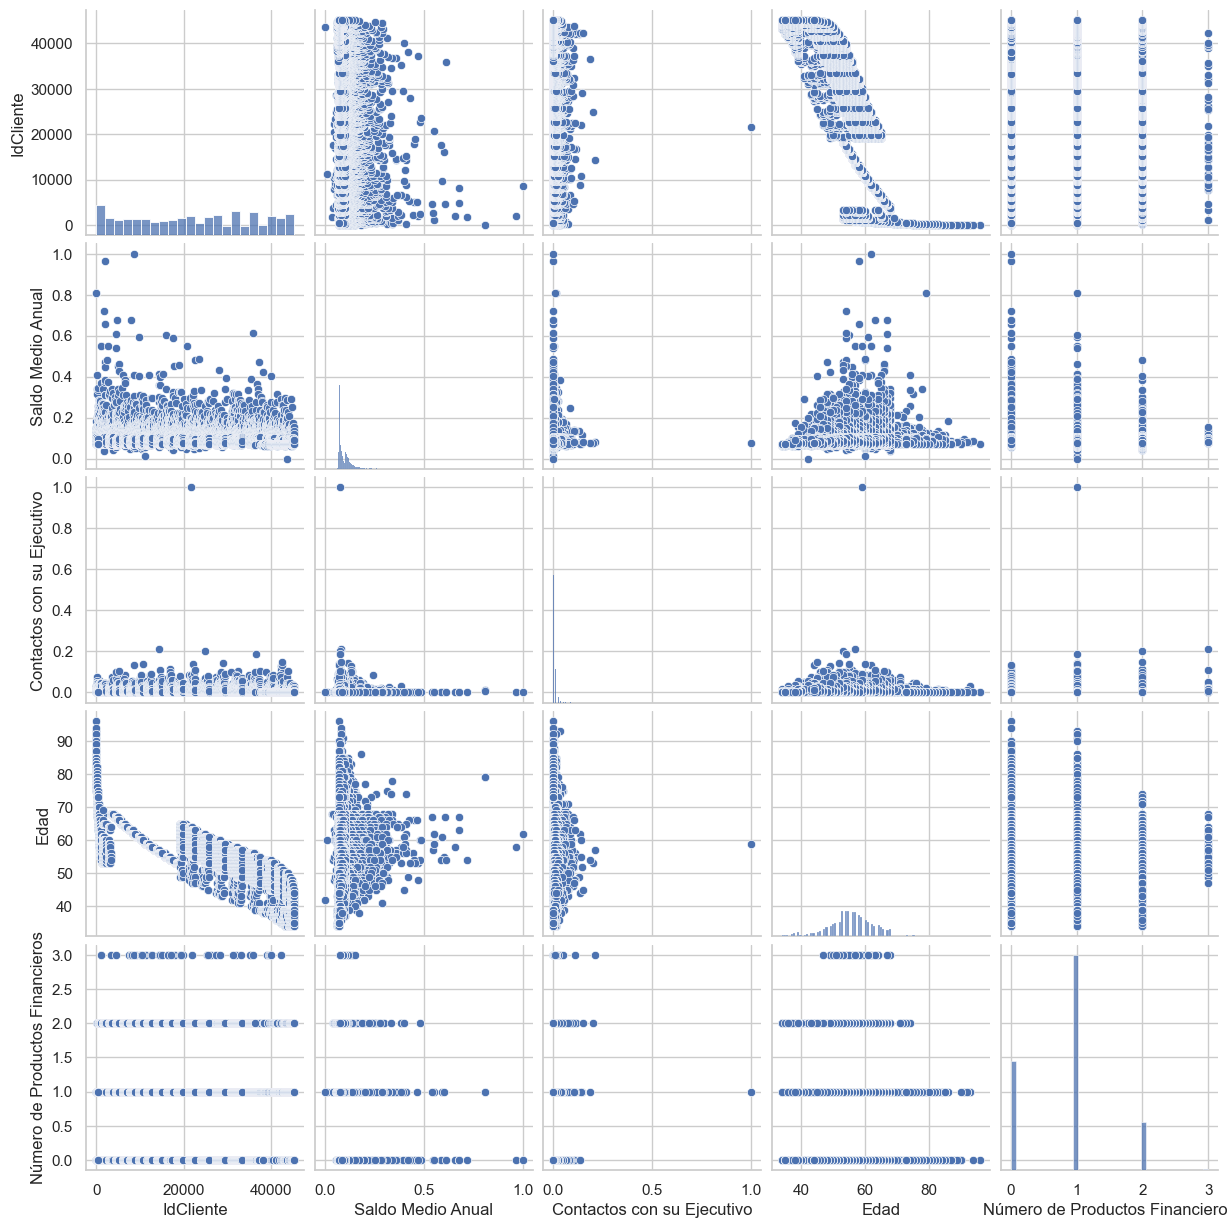

In [78]:
# hacemos mas scatter plots para ver la relacion entre las variables
sns.pairplot(data_numeric)
plt.show()

## observaciones clave

IdCliente vs Edad:
- Fuerte correlación negativa, como ya se mencionó, donde clientes con identificadores más altos tienden a ser más jóvenes.

Saldo Medio Anual vs Edad:
- No hay una correlación clara, aunque se observa una mayor variabilidad en saldos para edades entre 50 y 60 años.

Contactos con su Ejecutivo vs Edad:
- No se observa una relación significativa, con contactos dispersos a través de todas las edades.

Número de Productos Financieros:
- Mayor cantidad de productos financieros está dispersa, sin una correlación clara con Edad o Saldo Medio Anual.

Distribuciones Univariadas:
- Saldo Medio Anual y Contactos con su Ejecutivo muestran distribuciones sesgadas hacia la izquierda.
Edad muestra una distribución más centrada alrededor de los 50 a 60 años.

---------------------------------------------------------------------------------------------------

ahora mediante una regresion lineal vamos a predecir el saldo medio anual basado en la variable de edad, numero de productos financieros y ademas actividad laboral y nivel educaciona...y evaluar la calidad del modelo

Error cuadrático medio: 0.0018972050683377592
Coeficiente de determinación R^2: 0.10983468012155084


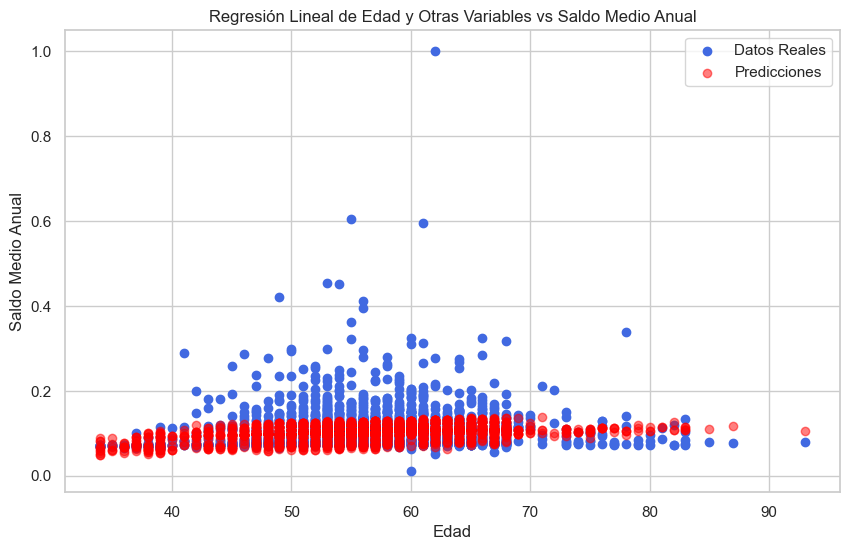

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Convertir variables categóricas en dummies
data_dummies = pd.get_dummies(data_2, columns=['Actividad Laboral', 'Nivel Educacional'], drop_first=True)

# Seleccionar las variables independientes y la variable dependiente
X = data_dummies[['Edad', 'Número de Productos Financieros'] + 
                 [col for col in data_dummies.columns if col.startswith('Actividad Laboral_')] + 
                 [col for col in data_dummies.columns if col.startswith('Nivel Educacional_')]]
y = data_dummies['Saldo Medio Anual']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'Error cuadrático medio: {mse}')
print(f"Coeficiente de determinación R^2: {r2}")

# Visualizar la regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Edad'], y_test, color='royalblue', label='Datos Reales')
plt.scatter(X_test['Edad'], y_pred, color='red', alpha=0.5, label='Predicciones')
plt.title('Regresión Lineal de Edad y Otras Variables vs Saldo Medio Anual')
plt.xlabel('Edad')
plt.ylabel('Saldo Medio Anual')
plt.legend()
plt.show()

## Observaciones

### Datos Reales vs. Predicciones
Datos Reales (Azul): 
- Los puntos azules representan los datos reales del saldo medio anual en relación con la edad. Podemos ver una amplia dispersión en los valores de saldo medio anual, especialmente en el rango de edades de 50 a 70 años.

Predicciones del Modelo (Rojo): 
- Los puntos rojos muestran las predicciones del modelo de regresión lineal. Las predicciones parecen estar concentradas en una línea horizontal alrededor de un valor constante, indicando que el modelo no captura bien la variabilidad del saldo medio anual.

### Distribución de Predicciones
Las predicciones del modelo están muy concentradas y no reflejan la dispersión observada en los datos reales.

### Comportamiento del Modelo
La falta de variabilidad en las predicciones indica que el modelo de regresión lineal multivariable utilizado es demasiado simple o que las variables independientes seleccionadas (incluyendo la edad) no son suficientes para predecir el saldo medio anual de manera efectiva.

### recomendaciones:
Necesidad de Más Variables: 
- La variabilidad en el saldo medio anual es influenciada por otros factores que no se han incluido en el modelo actual. Incorporar variables adicionales, como ingresos, gastos, activos, y otras características financieras, podría mejorar la capacidad predictiva del modelo.

Potencial para Modelos Más Complejos:
- Considerar el uso de técnicas de modelado más avanzadas, como árboles de decisión, random forests, o modelos de machine learning más sofisticados, podría ayudar a capturar mejor las relaciones complejas entre las variables.

### Error Cuadrático Medio (MSE):
El MSE es una medida de la media de los cuadrados de los errores, es decir, la diferencia promedio al cuadrado entre los valores predichos y los valores reales. Un valor de MSE más bajo indica que las predicciones del modelo están, en promedio, más cerca de los valores reales.

En este caso, el valor de 0.0018972050683377592 es relativamente bajo, lo que sugiere que las predicciones del modelo no están muy lejos de los valores reales. Sin embargo, debido a la normalización de los datos, este valor debe ser interpretado en el contexto de la escala de los datos.


### Coeficiente de Determinación (R^2):
El 𝑅2 indica la proporción de la varianza en la variable dependiente (Saldo Medio Anual) que es explicada por las variables independientes (Edad, Número de Productos Financieros, Actividad Laboral, y Nivel Educacional).

Un 𝑅2 de 0.10983468012155084 significa que aproximadamente el 10.98% de la variabilidad en el saldo medio anual puede ser explicada por el modelo. Esto sugiere que, aunque el modelo tiene cierta capacidad para explicar la variación en el saldo medio anual, hay una gran parte de la variabilidad que no está siendo capturada.

ahora guardamos el archivo excel

In [82]:
data_2.to_excel('data_set_listo.xlsx', index=False)

## diagramas de barras con las nuevas columnas

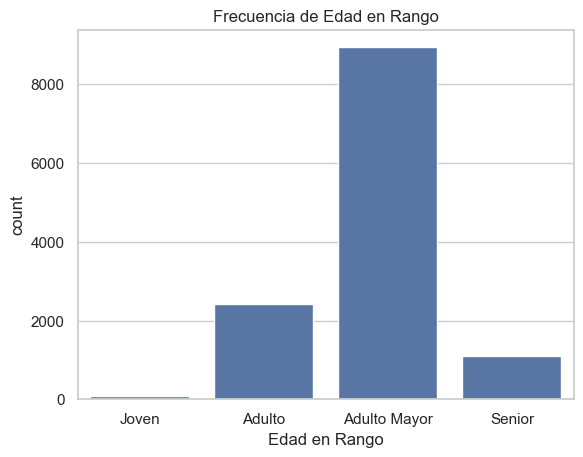

In [84]:
sns.countplot(data=data_2, x='Edad en Rango')
plt.title('Frecuencia de Edad en Rango')
plt.show()

### observaciones
Predominio de Adulto Mayor:
- La categoría Adulto Mayor (51-65 años) es la más predominante, con una frecuencia significativamente mayor que las otras categorías.
Esto indica que la mayoría de los clientes en el dataset se encuentran en este rango de edad.

Distribución de Adultos:
- La segunda categoría más común es Adulto (36-50 años), aunque su frecuencia es considerablemente menor que la de Adulto Mayor.

Poca Representación de Jóvenes y Seniors:
- Las categorías Joven (18-35 años) y Senior (>65 años) tienen la menor representación en el dataset. Especialmente, la categoría Joven tiene una frecuencia muy baja, indicando que hay muy pocos clientes en este rango de edad.

### estrategias
Estrategias de Marketing:
- Desarrollar campañas de marketing específicas para captar a la población joven, posiblemente mediante productos financieros diseñados para jóvenes profesionales o recién graduados.
Fortalecer las ofertas para clientes en el rango de Adulto Mayor con productos que les ayuden a prepararse para la jubilación y gestionar sus activos.

Desarrollo de Productos:
- Crear productos financieros que sean atractivos para los Jóvenes y Seniors, adaptados a sus necesidades específicas.
Ofrecer asesoramiento financiero personalizado para Adultos y Adulto Mayor para maximizar sus inversiones y planificar su futuro financiero.

Atención al Cliente:
- Asegurar que los servicios de atención al cliente estén bien equipados para manejar las consultas y necesidades de los Adulto Mayor, que constituyen la mayor parte de la clientela.


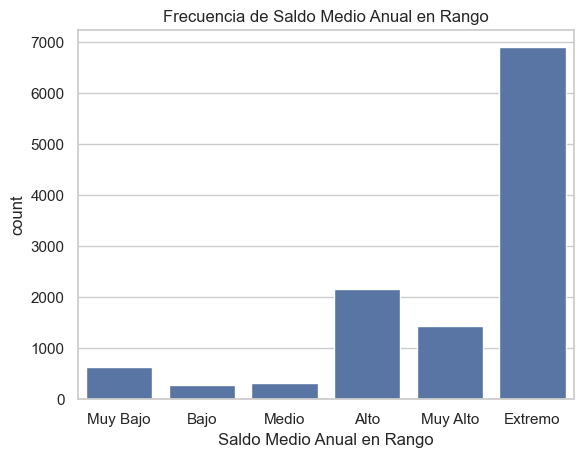

In [85]:
sns.countplot(data=data_2, x='Saldo Medio Anual en Rango')
plt.title('Frecuencia de Saldo Medio Anual en Rango')
plt.show()

## observaciones
Predominio del Rango Extremo:
- La categoría Extremo es la más predominante, con una frecuencia significativamente mayor que las otras categorías. Esto indica que una gran cantidad de clientes tienen un saldo medio anual extremadamente alto.

Distribución de Otros Rangos:
- Los rangos Alto y Muy Alto también tienen frecuencias notables, aunque significativamente menores que la categoría Extremo. Las categorías Muy Bajo, Bajo, y Medio tienen las frecuencias más bajas, indicando que pocos clientes tienen saldos medios anuales en estos rangos.

### estrategias
Estrategias de Producto:
- Productos para Altos Saldos: 
    - Desarrollar productos financieros sofisticados y servicios de gestión de patrimonio para clientes con saldos altos y extremos.
- Atracción de Clientes con Saldos Bajos: 
    - Implementar estrategias para atraer y apoyar a clientes con saldos más bajos, como cuentas de ahorro accesibles y programas de educación financiera.

Marketing y Segmentación:
- Campañas para Clientes de Altos Saldos: 
    - Realizar campañas de marketing dirigidas a clientes con altos saldos, destacando los beneficios y servicios exclusivos.
- Segmentación de Clientes:
    - Segmentar a los clientes en función de sus saldos medios anuales para ofrecer productos y servicios personalizados que se ajusten a sus necesidades financieras.

Atención al Cliente:
- Soporte Personalizado:
    - Proporcionar atención al cliente personalizada y asesoramiento financiero a los clientes con saldos altos y extremos.
- Programas de Inclusión Financiera:
    - Crear programas para mejorar la inclusión financiera de los clientes con saldos más bajos, ayudándoles a aumentar sus ahorros y mejorar su situación financiera.

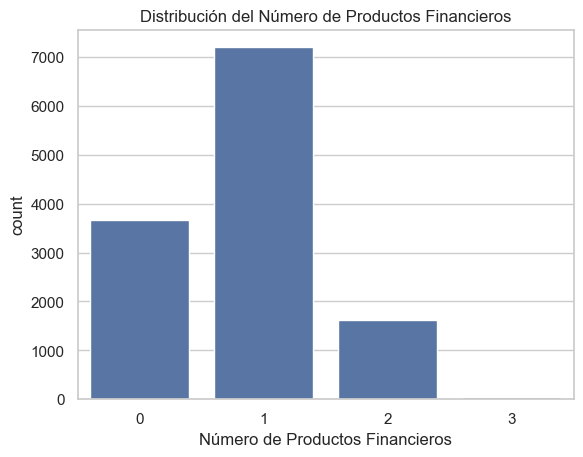

In [86]:
sns.countplot(data=data_2, x='Número de Productos Financieros')
plt.title('Distribución del Número de Productos Financieros')
plt.show()

## observacion general

Predominio de Clientes con 1 Producto Financiero:
- La mayoría de los clientes tienen exactamente 1 producto financiero, lo que es significativamente mayor en comparación con las otras categorías.

Clientes sin Productos Financieros:
- Un número considerable de clientes no tiene ningún producto financiero (0 productos).

- Clientes con 2 o Más Productos Financieros:
Hay menos clientes con 2 o 3 productos financieros, indicando que es menos común que los clientes posean múltiples productos financieros.

### estrategias
Estrategias de Producto:
- Incentivar Productos Adicionales: 
    - Crear estrategias y ofertas para que los clientes con un producto financiero consideren adquirir productos adicionales, como promociones cruzadas o descuentos por múltiples productos.
- Atraer Clientes sin Productos: 
    - Desarrollar campañas específicas para atraer a los clientes que actualmente no tienen ningún producto financiero, ofreciendo incentivos y educación financiera para ayudarlos a comenzar.

Marketing y Segmentación:
- Segmentación Basada en Productos: 
    - Segmentar a los clientes en función del número de productos financieros que poseen para personalizar las estrategias de marketing y venta.
Promociones y Ofertas: Crear promociones específicas dirigidas a cada segmento, con ofertas atractivas para aumentar el número de productos por cliente.

Atención al Cliente:
- Asesoramiento Personalizado: 
    - Proporcionar asesoramiento financiero personalizado para ayudar a los clientes a entender los beneficios de poseer múltiples productos financieros y cómo pueden beneficiarse de ellos.
- Programas de Lealtad: 
    - Implementar programas de lealtad que recompensen a los clientes por la adquisición de productos adicionales.

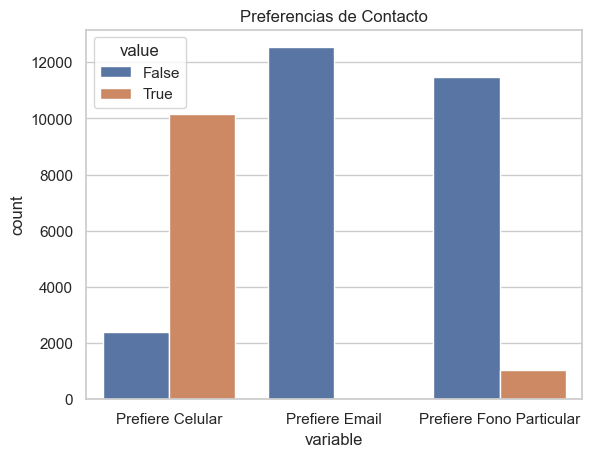

In [87]:
contact_preferences = ['Prefiere Celular', 'Prefiere Email', 'Prefiere Fono Particular']
df_melted = data_2.melt(value_vars=contact_preferences)
sns.countplot(data=df_melted, x='variable', hue='value')
plt.title('Preferencias de Contacto')
plt.show()

## observacion general

Preferencia por Email:
- La preferencia por email es la más alta, con una gran cantidad de clientes que no prefieren el email en comparación con aquellos que sí lo prefieren.

Preferencia por Celular:
- Una proporción significativa de clientes prefiere el contacto por celular, aunque el número de clientes que no prefieren el celular es ligeramente mayor.

Preferencia por Fono Particular:
- La preferencia por el teléfono particular es considerablemente menor en comparación con las otras dos opciones. La mayoría de los clientes no prefieren este medio de contacto.

## diagramas de caja con las nuevas columnas

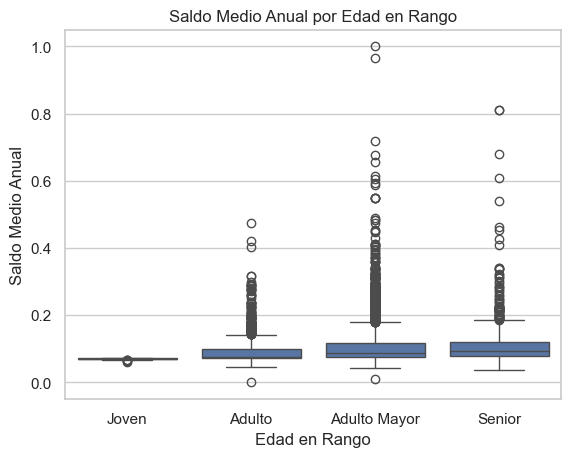

In [88]:
sns.boxplot(data=data_2, x='Edad en Rango', y='Saldo Medio Anual')
plt.title('Saldo Medio Anual por Edad en Rango')
plt.show()

## pbservacion general

Consistencia en Saldos Bajos:
- Los saldos medios anuales tienden a ser bajos en todos los grupos de edad, con medianas cercanas entre sí.

Mayor Variabilidad en Adulto Mayor:
- El rango Adulto Mayor (51-65 años) muestra una mayor variabilidad y algunos valores atípicos significativamente altos.

Pocos Valores Atípicos en Jóvenes y Seniors:
- Los grupos Joven y Senior tienen menos valores atípicos comparados con Adulto y Adulto Mayor

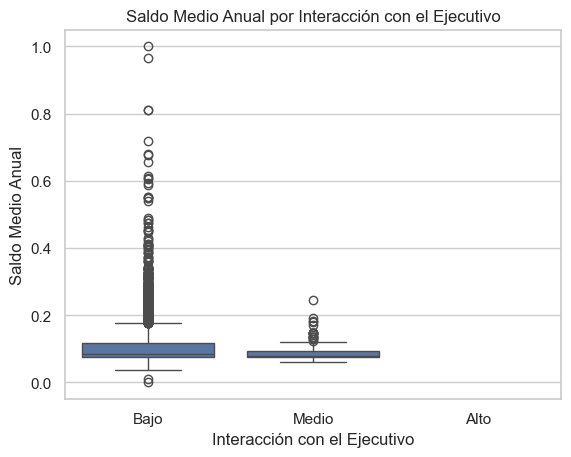

In [89]:
sns.boxplot(data=data_2, x='Interacción con el Ejecutivo', y='Saldo Medio Anual')
plt.title('Saldo Medio Anual por Interacción con el Ejecutivo')
plt.show()

## observacion general

Mayor Variabilidad en Interacción Baja:
- El grupo con interacción baja muestra la mayor variabilidad en el saldo medio anual y varios valores atípicos significativamente altos.

Saldos Moderados en Interacción Media y Alta:
- Los grupos con interacción media y alta tienen saldos medios anuales más consistentes y menores, con pocos valores atípicos.

Medianas Similares:
- Las medianas de los saldos medios anuales son similares en los tres niveles de interacción, aunque la dispersión es mayor en el grupo de interacción baja.

## diagramas de dispersion con las nuevas columnas

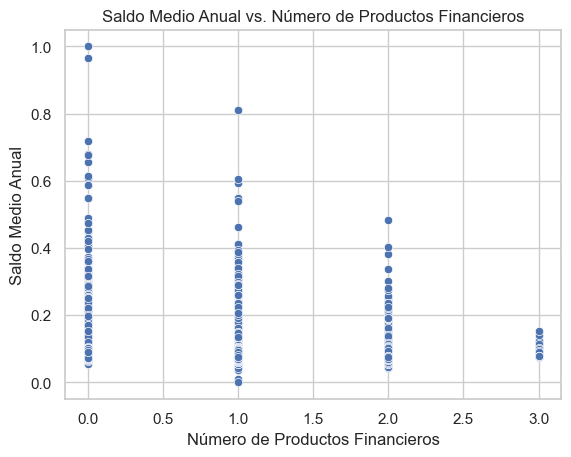

In [90]:
sns.scatterplot(data=data_2, x='Número de Productos Financieros', y='Saldo Medio Anual')
plt.title('Saldo Medio Anual vs. Número de Productos Financieros')
plt.show()

## observacion general


Distribución por Productos Financieros:
- Los puntos están distribuidos en columnas verticales correspondientes a cada número de productos financieros (0, 1, 2, 3).

Variabilidad en Saldos con 0 y 1 Productos:
- Hay una mayor variabilidad en los saldos medios anuales para clientes con 0 y 1 productos financieros. Algunos de estos clientes tienen saldos significativamente altos.

Consistencia en Saldos con 2 y 3 Productos:
- Los clientes con 2 y 3 productos financieros tienen saldos más consistentes y menores, sin valores extremos tan altos como los observados en clientes con menos productos.

## diagramas de violin con las nuevas columnas

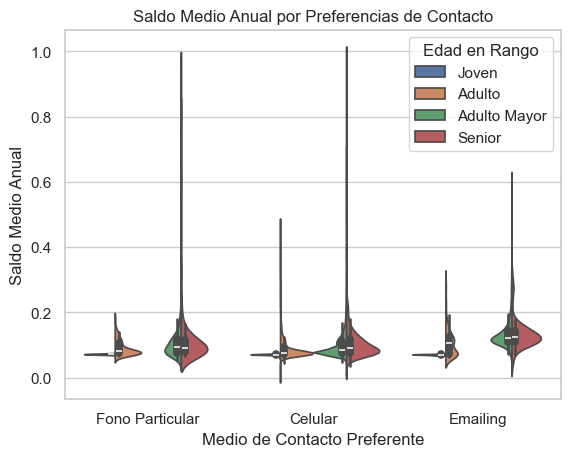

In [95]:
sns.violinplot(data=data_2, x='Medio de Contacto Preferente', y='Saldo Medio Anual', split=True, hue='Edad en Rango')
plt.title('Saldo Medio Anual por Preferencias de Contacto')
plt.show()

## observacion general

Variabilidad por Medio de Contacto:
- Los saldos medios anuales varían entre los diferentes medios de contacto preferidos. Los clientes que prefieren el Emailing parecen tener una distribución más amplia y algunas colas largas hacia valores altos.

Distribución por Edad:
- En general, las distribuciones de saldo medio anual no varían mucho entre los diferentes grupos de edad dentro de cada medio de contacto.
Los Adultos Mayores y Seniors muestran una ligera tendencia a tener saldos medios anuales más altos, especialmente en los clientes que prefieren el Emailing.

Medio de Contacto Preferido:
- El Fono Particular y el Celular tienen distribuciones más concentradas y menos variabilidad en comparación con el Emailing.
Las colas largas en las distribuciones indican la presencia de algunos clientes con saldos medios anuales extremadamente altos, especialmente para el Emailing.